In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from plots import eval_hist, single_hist

In [7]:
train_data = np.load('data/train.npz')
train_data.files

['bands', 'lulc']

# Data Exploration

## lulc data
The lulc data contains the labels for the patches in bands.

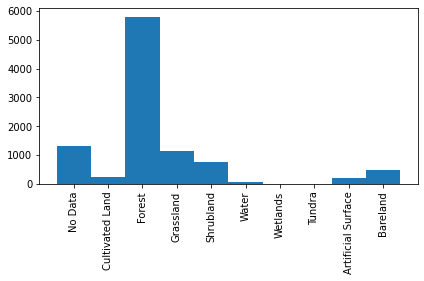

In [8]:
a = train_data['lulc']
single_hist(a)

In [9]:
bands = train_data['bands']
y_true = train_data['lulc']

In [10]:
X = bands[:, :, 17, 17, :].reshape((10000, 12, 6))
X.shape

(10000, 12, 6)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y_true, test_size=0.3, random_state=42)

In [12]:
nsamples, f_one, f_two = X_train.shape
X_train_d2 = X_train.reshape((nsamples, f_one * f_two))

nsamples, f_one, f_two = X_val.shape
X_val_d2 = X_val.reshape((nsamples, f_one * f_two))

In [13]:
clf=DecisionTreeClassifier(criterion='gini')
clf.fit(X_train_d2, y_train)
y_pred=clf.predict(X_val_d2)

In [14]:
print("Tree depth: {:.2f}".format(clf.get_depth()))
print("Number of leafs: {:.2f}".format(clf.get_n_leaves()))
print("Accuracy on training set: {:.2f}".format(clf.score(X_train_d2, y_train)))
print("Accuracy on validation set: {:.2f}".format(clf.score(X_val_d2, y_val)))

Tree depth: 27.00
Number of leafs: 1106.00
Accuracy on training set: 1.00
Accuracy on validation set: 0.65


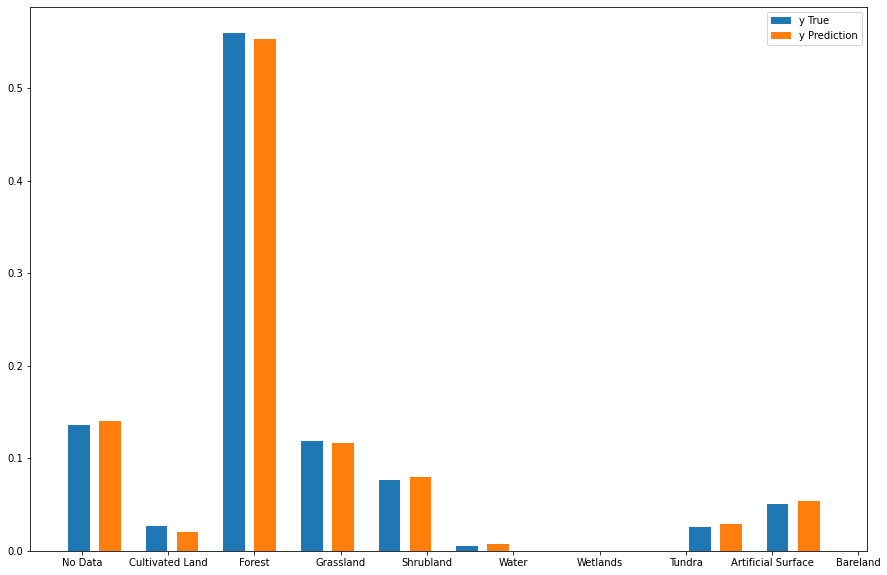

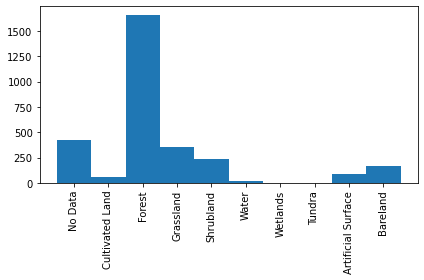

In [15]:
eval_hist(y_val, y_pred)
single_hist(y_pred)